## **Análise de Dados sobre acidentes em rodovias federais no Brasil por Bruno Deschamps.**



---



Muito se fala sobre o grande número de acidentes nas rodovias federais brasileiras, onde pela alta ocorrencia de acidentes, tende a deixar o condutor cada vez mais inseguro.

Diante deste cenário, irei analisar os dados com base no banco de dados abertos do governo no ano de 2016, com a finalidade de encontrar respostas que possam explicar o padrão dos acidentes.

A base de dados se encontra em:
https://www.kaggle.com/datasets/equeiroz/acidentes-rodovias-federais-brasil-jan07-a-jul19


---








# *Analisando e Tratando Dados com Pandas.*

Primeiro irei exportar as bibliotecas e o dataframe contendo a base de dados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('dados_transito2016.csv', sep=',')

In [3]:
df.head() #mostrando as primeiras 5 linhas do data frame

,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,fase_do_dia,condicao_tempo,tipo_da_pista
0,10/06/16,Sexta,18:30:00,RJ,101,66,Outras,Colisão com objeto fixo,NaN,Plena noite,...,2,0,0,0,2,0,0,Plena noite,Nublado,Múltipla
1,01/01/16,Sexta,01:30:00,SC,101,"135,5",Falta de atenção,Colisão traseira,Com Vítimas Feridas,Plena noite,...,2,0,1,0,1,0,1,Plena noite,Vento,Simples
2,01/01/16,Sexta,01:00:00,PR,277,2,Ingestão de álcool,Colisão traseira,Com Vítimas Feridas,Plena noite,...,2,0,1,0,1,0,1,Plena noite,Ceu Claro,Dupla
3,01/01/16,Sexta,01:45:00,PR,476,357,Outras,Colisão com bicicleta,Com Vítimas Feridas,Plena noite,...,2,0,0,1,0,1,1,Plena noite,Nublado,Simples
4,01/01/16,Sexta,02:00:00,SE,101,"94,2",Falta de atenção,Queda de motocicleta / bicicleta / veículo,Com Vítimas Feridas,Plena noite,...,1,0,1,0,0,0,1,Plena noite,Ceu Claro,Dupla


In [4]:
df.shape #mostra o número de linhas e colunas do df

(96363, 25)

In [5]:
df.info() #informaçoes sobre o df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96363 entries, 0 to 96362
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   data_inversa            96363 non-null  object
 1   dia_semana              96363 non-null  object
 2   horario                 96363 non-null  object
 3   uf                      96363 non-null  object
 4   br                      96363 non-null  int64 
 5   km                      96363 non-null  object
 6   causa_acidente          96363 non-null  object
 7   tipo_acidente           96363 non-null  object
 8   classificacao_acidente  96362 non-null  object
 9   fase_dia                96362 non-null  object
 10  sentido_via             96363 non-null  object
 11  condicao_metereologica  96360 non-null  object
 12  tipo_pista              96363 non-null  object
 13  tracado_via             96363 non-null  object
 14  uso_solo                96363 non-null  object
 15  pe

In [6]:
df['data_inversa'] = pd.to_datetime(df['data_inversa']) #tratando os dados da forma correta para uma melhor análise.
df['mes'] = df['data_inversa'].dt.month #Criando uma nova coluna com o mes do acidente.


Agora para uma análise eficiente, irei analisar os dados utilizando gráficos com o Seaborn e Matplotlib, relatando fatores importantes para a compreensão da problemática.






# **QUANDO**


---
Entender quando os acidentes acontecem é extremamente necessário, sendo neste contexto, um ótimo indicador para o entendimento do problema e tambem de seus padrões.






## **Mes do Ano**

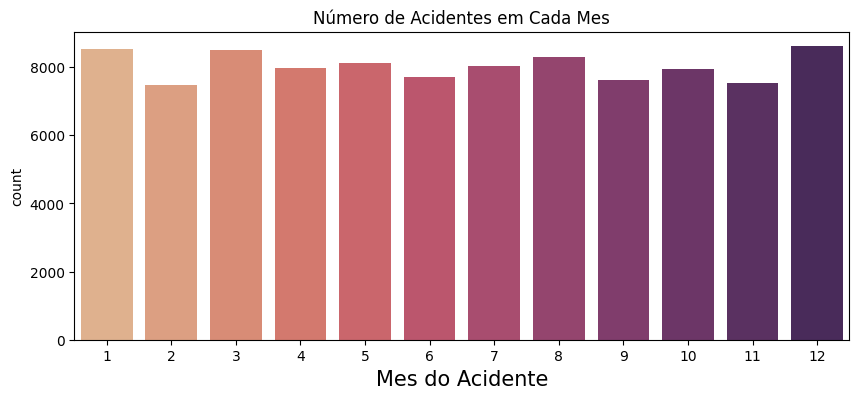

In [7]:
plt.figure(figsize=(10,4))
plt.title('Número de Acidentes em Cada Mes')
plt.xlabel('Mes do Acidente', fontsize=15)
sns.countplot(data=df, x='mes',hue='mes', legend=False, palette='flare');

In [8]:
df['mes'].value_counts(normalize=True)*100 #Percentual de Acidentes pelos meses em porcentagem

12    8.937040
1     8.842606
3     8.836379
8     8.607038
5     8.422320
7     8.328923
4     8.282225
10    8.243828
6     8.009298
9     7.908637
11    7.821467
2     7.760240
Name: mes, dtype: float64

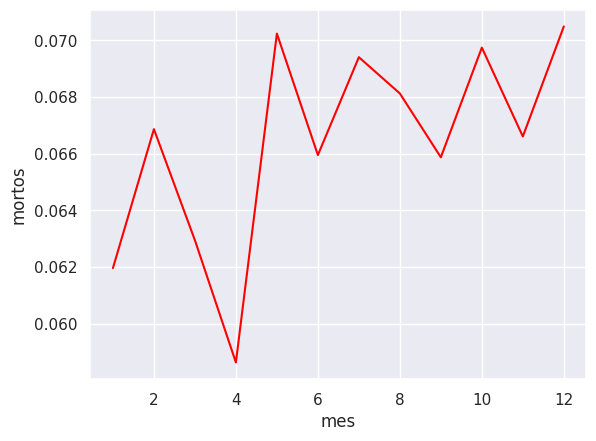

In [9]:
sns.set_theme(style='darkgrid')
sns.lineplot(data=df, x='mes', y='mortos', color='red', errorbar=None); #Relação entre os meses e mortes após acidentes


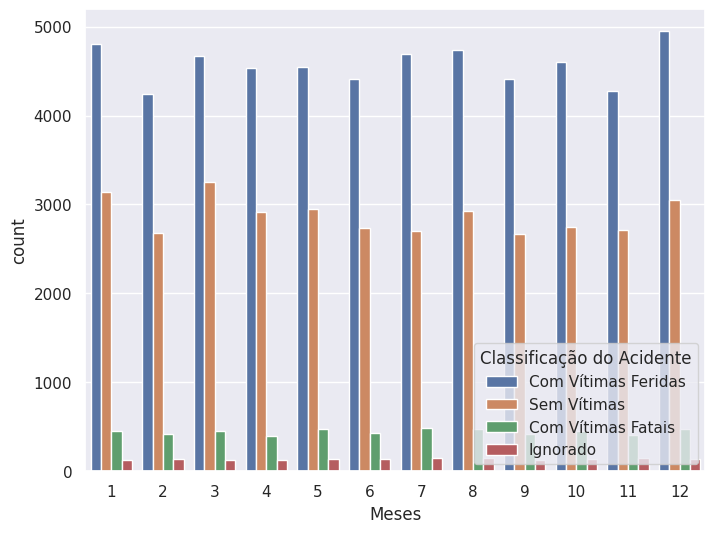

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='mes', hue='classificacao_acidente')
 #Aqui vemos uma relação entre os meses e a classificação do acidente, mostrando que apesar do mes de abril(4) ser
 # o com menos mortes, ele não se torna o mais seguro.
plt.legend(title='Classificação do Acidente',loc='lower right')
plt.xlabel('Meses');

Após o gráfico e a contagem, podemos perceber um pico dos acidentes em Dezembro(12) e Janeiro (1),provavelmente provocados pelo aumento de veiculos nas estradas devido aos feriados e férias da mesma época. Além disso, um alto número de mortes é relatado nos meses de Junho(5), Outubro(10) e Dezembro(12).


---



## **Dia da Semana e Turnos(fases) do Dia**

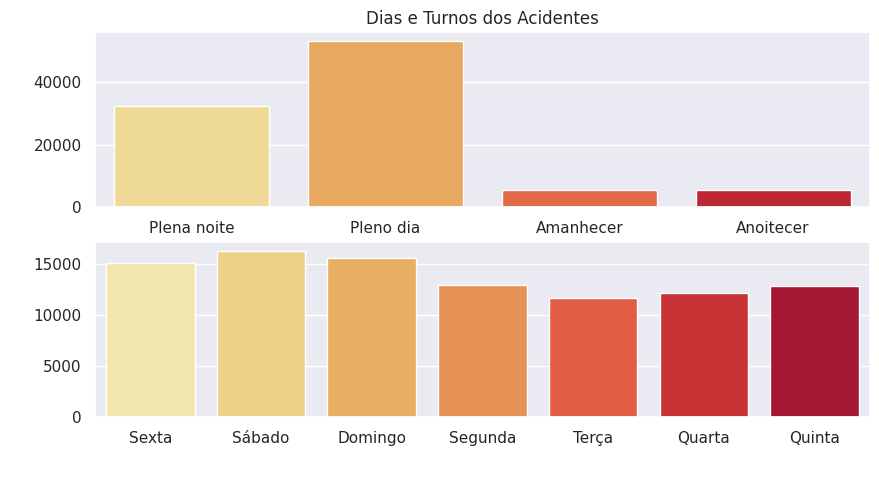

In [11]:
def plot(titulo,data1,data2,x1,x2):
  plt.figure(figsize=(10,5))
  plt.subplot(2,1,1)
  plt.xlabel(' ')
  plt.ylabel(' ')
  plt.title(titulo)
  sns.countplot(data=data1, x=x1, hue=x1, legend=False, palette='YlOrRd')
  plt.subplot(2,1,2)
  sns.countplot(data=data2, x=x2 , hue=x2, palette='YlOrRd')
  plt.ylabel(' ')
  plt.xlabel(' ');

plot('Dias e Turnos dos Acidentes', df, df, 'fase_dia', 'dia_semana')

In [12]:
vitimas_fatais = df.query('classificacao_acidente == "Com Vítimas Fatais"') #criando um query para mostrar o gráfico com acidentes fatais

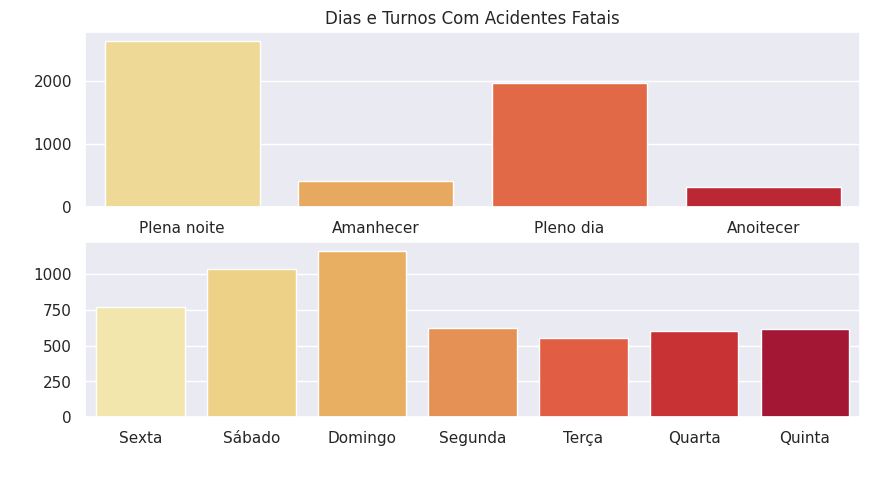

In [13]:
plot('Dias e Turnos Com Acidentes Fatais', vitimas_fatais, vitimas_fatais, 'fase_dia', 'dia_semana')

Diante do primeiro gráfico, vemos que os acidentes tem sua maior parte ao longo do dia e aos finais de semana, com seu pico no sábado. Já no segundo gráfico, que relata acidentes que resultaram em mortes, temos uma maior frequencia na parte da **Noite** de acidentes, e com um foco maior no Sábado e principalmente Domingo.

## **Condiçoes Climáticas**

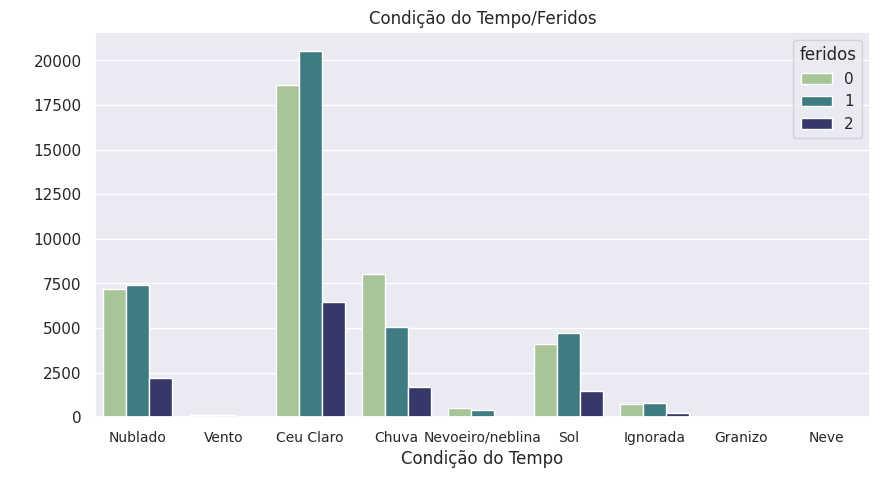

In [14]:
plt.figure(figsize=(10,5))
plt.title('Condição do Tempo/Feridos')
plt.ylabel(' ')
plt.xlabel(' ')
plt.xlabel('Condição do Tempo')
data_feridos = df.query('feridos <= 2') #fiz um query para a ánalise ficar mais limpa e não contar com dados quebrados e mínimos
sns.countplot(x='condicao_tempo', data=data_feridos, hue='feridos', palette='crest') #frequencia da quantidade/porcentagem de feridos nas condiçoes do tempo
plt.xticks(fontsize=10);

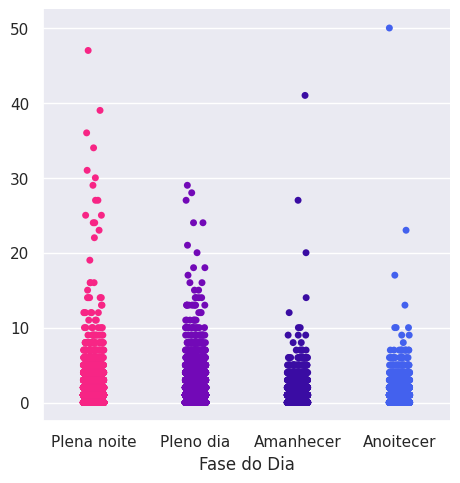

In [15]:
palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE",]
sns.set()
sns.catplot(x='fase_do_dia', y='feridos', palette=palette, hue='fase_do_dia', legend=False, data=df)#boxplot relacionando a fase do dia com pessoas feridos
plt.ylabel('')
plt.xlabel('Fase do Dia');

Dado o boxplot acima, vemos uma consisténcia de acidentes com feridos na parte da noite.

# **Análise de Como Acontecem os Acidentes**


---



In [16]:
df['causa_acidente'].value_counts(normalize=True)*100 #frequencia da causa dos acidentes em %

Falta de atenção                      27.449332
Outras                                25.599037
Velocidade incompatível               12.787066
Não guardar distância de segurança     6.601081
Ingestão de álcool                     6.570987
Defeito mecânico em veículo            5.303903
Desobediência à sinalização            5.035128
Dormindo                               3.905026
Animais na Pista                       2.703320
Ultrapassagem indevida                 2.414827
Defeito na via                         1.630294
Name: causa_acidente, dtype: float64

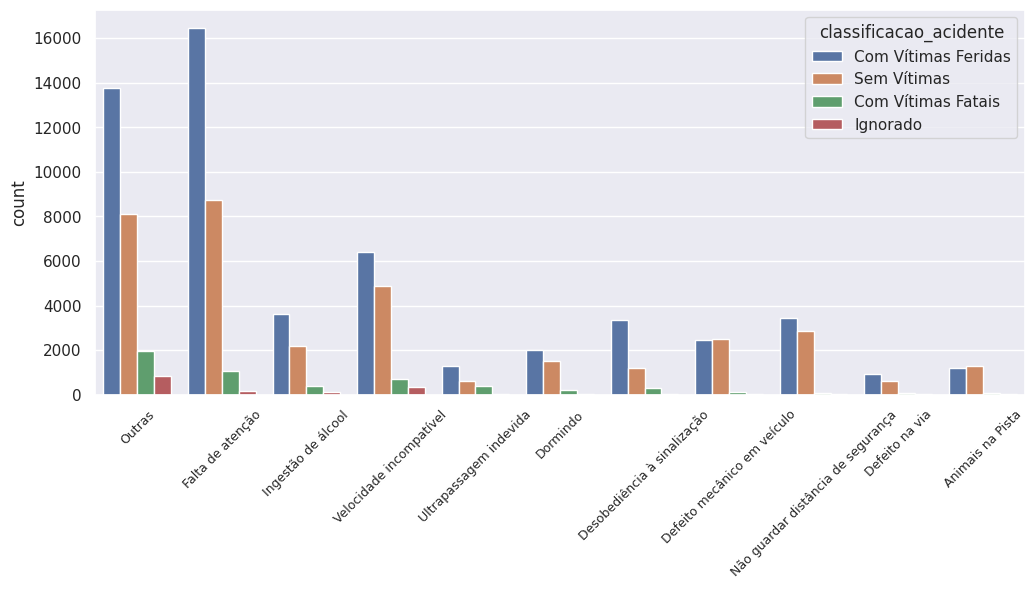

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='causa_acidente', hue='classificacao_acidente') #comparação da frequencia das causas com a
# classificação do acidente
plt.xticks(rotation=45);
plt.xlabel(' ');
plt.xticks(fontsize=9);

In [18]:
df['tipo_acidente'].value_counts(normalize=True)*100 #Frequencia dos tipos de acidentes em %

Colisão traseira                              19.864471
Saída de Pista                                16.876810
Colisão lateral                               11.638284
Colisão Transversal                           11.072715
Capotamento                                    7.032782
Colisão com objeto fixo                        6.931084
Queda de motocicleta / bicicleta / veículo     6.265890
Colisão frontal                                5.449187
Tombamento                                     5.271733
Atropelamento de pessoa                        3.652854
Atropelamento de animal                        2.260204
Colisão com bicicleta                          1.281612
Incêndio                                       1.021139
Colisão com objeto móvel                       0.585287
Derramamento de Carga                          0.452456
Danos Eventuais                                0.343493
Name: tipo_acidente, dtype: float64

Diante desses dados vemos uma grande quantidade de acidentes provocados pela falta de atenção do motorista, chegando próximo dos 30% de todos os acidentes registrados no banco de dados. As variáveis Ingestão de álcool será vistas mais tarde para uma melhor análise.


# **ONDE**
Diante de uma análise de acidentes, o local de **onde** acontecem mais acidentes se torna de suma importancia para uma futura resolução e segurança da via.


---



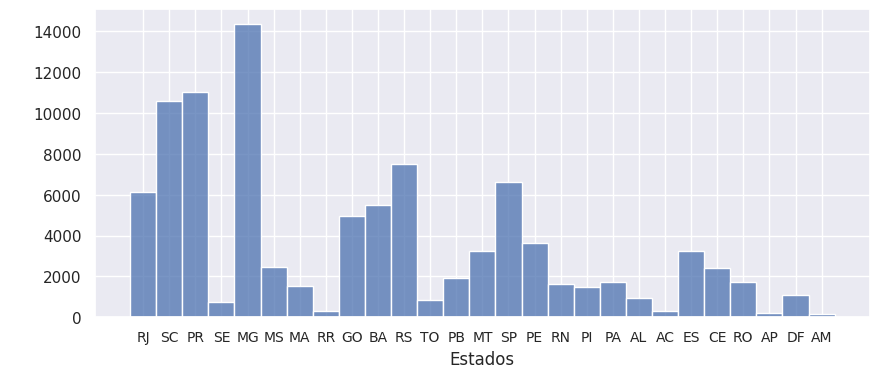

In [19]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='uf') #Frequencia de acidentes de cada estado em histograma
plt.xlabel('Estados')
plt.ylabel(' ')
plt.xticks(fontsize=10);

In [20]:
df['uf'].value_counts(normalize=True)*100 #Frequencia de acidentes de cada estado em %

MG    14.913400
PR    11.448377
SC    11.005261
RS     7.798636
SP     6.882310
RJ     6.348910
BA     5.703434
GO     5.155506
PE     3.759742
MT     3.385117
ES     3.351909
MS     2.559074
CE     2.510300
PB     2.004919
PA     1.798408
RO     1.779729
RN     1.687370
MA     1.570105
PI     1.557652
DF     1.106234
AL     0.986893
TO     0.867553
SE     0.791798
AC     0.342455
RR     0.307172
AP     0.205473
AM     0.172265
Name: uf, dtype: float64

In [21]:
df['br'].value_counts(normalize=True)*100

116    15.535008
101    15.115760
381     5.683717
40      4.644936
153     4.161348
         ...    
1       0.001038
0       0.001038
241     0.001038
403     0.001038
421     0.001038
Name: br, Length: 115, dtype: float64

Diante dos dados acima, vemos uma grande porcentagem dos acidentes nas BR's 116 e 101, além de uma predominância dos acidentes nos estados de Minas Gerais(MG), Santa Catarina(SC) e Paraná(PR).

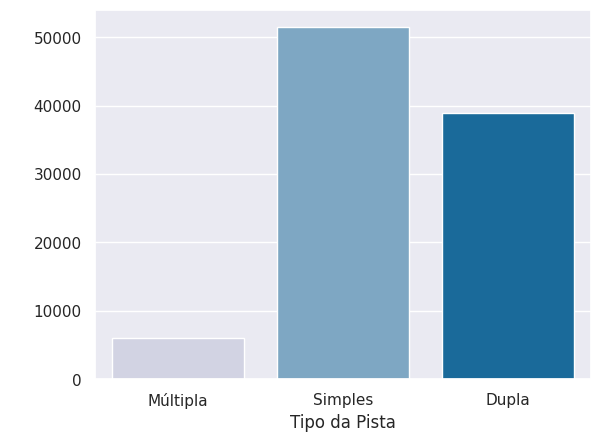

In [22]:
sns.countplot(data=df, x='tipo_da_pista', palette='PuBu', hue='tipo_da_pista', legend=False) #frequencia relaciona o tipo de pista com os acidentes
plt.xlabel('Tipo da Pista')
plt.ylabel(' ');

Após analisar o gráfico acima, vemos um grande número de acidentes nas faixas simples, com logo em seguida a faixa dupla, e, com menos de 1000 acidentes a faixas múltipla se prova muito mais segura que ambas.



---

## **Analisando Dados com Vítimas Fatais**


In [23]:
# Calculando a taxa de mortalidade para acidentes com causa pela ingestão de alcool
taxa_mortalidade_com_alcool = df.query("causa_acidente == 'Ingestão de álcool'")['mortos'].sum() / len(df.query("causa_acidente == 'Ingestão de álcool'"))*100

# Calculando a taxa de mortalidade para acidentes sem a ingestão de alcool
taxa_mortalidade_sem_alcool = df.query("causa_acidente != 'Ingestão de álcool'")['mortos'].sum() / len(df.query("causa_acidente != 'Ingestão de álcool'"))*100

# Comparando as taxas de mortalidade
print("Taxa de mortalidade em acidentes causadas pela ingestão de álcool:", taxa_mortalidade_com_alcool)
print("Taxa de mortalidade em acidentes sem ingestão de álcool:", taxa_mortalidade_sem_alcool)


Taxa de mortalidade em acidentes causadas pela ingestão de álcool: 6.933038534428301
Taxa de mortalidade em acidentes sem ingestão de álcool: 6.6188312914440575


A partir do print acima, mesmo que nos gráficos da causa dos acidentes a ingestão de alcool aparece como 5%, podemos tirar a conclusão de que a probabilidade da mortalidade em acidentes relacionados á ingestão de álcool é maior do que a sem a ingestão.

In [24]:
vitimas_fatais['tipo_acidente'].value_counts(normalize=True)*100

Colisão frontal                               27.507003
Atropelamento de pessoa                       18.169935
Saída de Pista                                10.644258
Colisão traseira                              10.308123
Colisão Transversal                            8.739496
Colisão lateral                                5.938375
Capotamento                                    4.220355
Queda de motocicleta / bicicleta / veículo     3.697479
Colisão com bicicleta                          3.454715
Colisão com objeto fixo                        3.305322
Tombamento                                     1.998133
Atropelamento de animal                        1.456583
Colisão com objeto móvel                       0.466853
Incêndio                                       0.074697
Danos Eventuais                                0.018674
Name: tipo_acidente, dtype: float64

In [25]:
vitimas_fatais['uf'].value_counts(normalize=True)*100

MG    12.567694
PR    10.121382
BA     8.944911
SC     6.872082
PE     6.255836
RJ     5.975724
RS     5.602241
GO     5.340803
SP     4.444444
CE     3.660131
MT     3.454715
MA     3.286648
ES     3.006536
PA     2.782446
PI     2.614379
PB     2.446312
RN     2.427638
MS     2.296919
RO     1.699346
AL     1.587302
TO     1.549953
DF     0.933707
SE     0.859010
RR     0.392157
AM     0.336134
AC     0.317460
AP     0.224090
Name: uf, dtype: float64

A partir dessa análise vemos um grande número de mortes no estado da **Bahia(BA)**, que apesar dos 5% de acidentes totais, é o terceiro estado com maior frequencia de morte.


# **Conclusão**


---





*   **Dezembro, Janeiro e Março** foram os meses com maior frequencia de acidentes, enquanto **Junho, Outubro e Dezembro** foram os com mais mortes.
*   Os acidentes geralmente acontecem na parte do **dia**, com um maior número nos finais de semana**(Sexta,Sábado e Domingo)**, entretando o maior número de **mortes** ocorre a **noite** e aos **Domingos**.


*  **A falta de atenção** do motorista assume **27%** de todos os acidentes registrados no banco de dados.
*  **Minas Gerais(MG)** lídera os estados em números de acidentes com **14%**, enquanto **Paraná(PR)** e **Santa Catarina (SC)** formam o pódio com 11% ambos.

*   As rodovias federais **BR 116 e 101** se distanciam das outras em relação aos acidentes, com **15%** ambas.
*   A Colisão Frontal é responsável por **27%** das mortes no transito.







Diante deste cenário, necessita-se de uma maior fiscalização nas rodovias em meses de férias(Janeiro e Dezembro) assim como feriados, com maior foco pela parte da noite. Além disso,